### 관련용어

1. **크롤링(Crawling)**<br>

 웹을 탐색하는 컴퓨터 프로그램(크롤러)을 이용하여 여러 인터넷 사이트의 웹페이지 자료를 수집하여 분류하는 과정


2. **스크래핑(Scraping)**<br>

 웹 사이트의 내용을 긁어다 원하는 형태로 가공하는 기술. 즉, 웹 사이트의 데이터를 수집하는 모든 작업을 의미


3. **파싱(Parsing)**<br>

 어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공하는 것  
 예) html소스를 문자열로 수집하여 html태그를 인식하도록 정보를 가공하여 html 단위별 분석이 가능하게 구성할 수 있음

In [18]:
import urllib.request   # 웹에 통신 데이터를 요청하는 모듈
from bs4 import BeautifulSoup

## 웹 상에 있는 html 소스 가져오기 (www.naver.com) = 스크래핑
url = 'http://www.naver.com'
resp = urllib.request.urlopen(url)
#print(resp)      # <http.client.HTTPResponse at 0x1ae236082b0> => 데이터가 저장되어 있는 것을 알 수 있음

data = resp.read()
print(type(data))  # <class 'bytes'>
#print(data)  # url로부터 가져온 html 소스를 byte 자료형으로 저장해옴


## html 파싱
html = data.decode('utf-8')     # byte -> 문서타입으로 변환
print(type(html))  # str    - 문서타입으로 변환된 html소스가 출력됨
soup = BeautifulSoup(html, 'html.parser')   # html 문서를 html 소스로 파싱
print(type(soup))  # BeautifulSoup


### 태그 내용 가져오기

# 1. h1 태그 가져오기 (find() 메서드 사용 & 직접 참조)
h1 = soup.find('h1')    # soup에 저장된 html 소스 중 가장 처음에 있는 h1태그에 대한 정보를 가져옴
print(h1)               #<h1 class="logo_default"><a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a></h1>
print('-'*50)
print(h1.a)             # <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
print('-'*50)
print(h1.a.string)      # 네이버
print('-'*50)

# 2. find_all()
h2s = soup.find_all('h2')   # :param name: A filter on tag name.
type(h2s)        # bs4.element.ResultSet
# print(h2s)       # type은 ResultSet이지만, list 형태로 데이터 처리됨

print('h2 태그 문자열들 출력 ======')
for h2 in h2s :
    print(h2.string)        # h2태그 중 텍스트만 출력



<class 'bytes'>
<class 'str'>
<class 'bs4.BeautifulSoup'>
<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1>
--------------------------------------------------
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
--------------------------------------------------
네이버
--------------------------------------------------
h2 태그 문자열들 출력 ======
뉴스스탠드
주제별 캐스트
Sign in
타임스퀘어


#### [문제] www.naver.com에서 a태그 정보를 수집하고 링크 문자열을 출력하는 코드를 작성

==================== a태그 정보 모두 출력 ====================
<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
<a href="#themecast"><span>주제별캐스트 바로가기</span></a>
<a href="#timesquare"><span>타임스퀘어 바로가기</span></a>
<a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>
<a href="#account"><span>로그인 바로가기</span></a>
<a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/banner/details/darkmode?=main&amp;wpid=RydDy7"></a>
<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #ec6554">다운로드</span></a>
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>
<a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버<
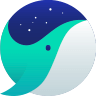
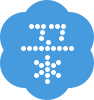

In [19]:
import urllib.request
from bs4 import BeautifulSoup
resp = urllib.request.urlopen('http://www.naver.com')
data = resp.read()                          # byte타입으로 받음
data = data.decode('utf-8')                 # 문서 타입으로 변환
data = BeautifulSoup(data, 'html.parser')   # html소스 형태로 변환

atags = data.find_all('a')
print('='*20,'a태그 정보 모두 출력','='*20)
for a in atags :
    print(a)

#### [예제] 파일을 이용하여 html01.html을 읽어보기

In [20]:
import urllib.request
from bs4 import BeautifulSoup

# html01 파일 읽기
rfile = open('data/html01.html', encoding='utf-8')
html01 = rfile.read()
print(type(html01))    # <class 'str'> => open 메서드로 인해 읽으면서 바로 decoding 됨

# html 파싱
source = BeautifulSoup(html01,'html.parser')

# h1 접근
h1 = source.html.body.h1    # DOM 형식 (Document Object Mode - 계층적 구조로 접근)
print(h1)
h1.string

# h2 접근
h2 = source.find('h2')
print(h2.string)

# body 접근 - children
body = source.html.body
print('body의 하위 태그들 모두 출력')
# for x in body.children : print(x)

# li 태그들을 찾아서 출력하고, 내용을 출력
lis = source.find_all('li')
print(lis)
idx = 0
for x in lis :
    print(f'liTags[{idx}] : {x}')
    idx += 1

<class 'str'>
<h1> 시멘틱 태그 ?</h1>
 주요 시멘틱 태그 
body의 하위 태그들 모두 출력
[<li> header : 문서의 머리말 (사이트 소개, 제목, 로그) </li>, <li> nav : 네비게이션 (메뉴) </li>, <li> section : 웹 문서를 장(chapter)으로 볼 때 절을 구분하는 태그 </li>, <li> aside : 문서의 보조 내용 (광고, 즐겨찾기, 링크) </li>, <li> footer : 문서의 꼬리말 (작성자, 저작권, 개인정보보호) </li>]
liTags[0] : <li> header : 문서의 머리말 (사이트 소개, 제목, 로그) </li>
liTags[1] : <li> nav : 네비게이션 (메뉴) </li>
liTags[2] : <li> section : 웹 문서를 장(chapter)으로 볼 때 절을 구분하는 태그 </li>
liTags[3] : <li> aside : 문서의 보조 내용 (광고, 즐겨찾기, 링크) </li>
liTags[4] : <li> footer : 문서의 꼬리말 (작성자, 저작권, 개인정보보호) </li>


In [21]:
### 태그 속성 찾기
# 파일 읽기
rfile2 = open('data/html02.html','r',encoding='utf8')
src2 = rfile2.read()

# html 파싱
html02 = BeautifulSoup(src2, 'html.parser')

# a tag 찾기
links = html02.find_all('a')    # a태그 모두 찾기
print('links size =',len(links))

# a tag에서 속성 찾기
for link in links :
    try :
        print(link)                     # <a href="www.naver.com">네이버</a>
        print(link.attrs['href'])       # www.naver.com >> DOM 구조로 접근 (a.href - a태그의 href속성)
        print(link.attrs['target'])     # _blank >>> DOM 구조로 접근 (a.target - a태그의 target속성)
    except Exception as e :
        print('예외 발생 :',e)            # 예외 발생 : 'target' >> target 속성이 없을 때 이렇게 처리됨
        
        
### 정규표현식으로 속성 찾기

import re
print('패턴 객체를 생성하여 속성 찾기')
patt = re.compile('http://')            # patt 객체 생성
links = html02.find_all(href=patt)      # 패턴 찾기
print(links)    # 'http://'가 포함된 href속성을 가진 a태그만 출력    
 
links = html02.find_all(target='_blank')    # 패턴 찾기
print(links)    # target속성의 값이 '_blank'인 a태그만 출력


links size = 5
<a href="www.naver.com">네이버</a>
www.naver.com
예외 발생 : 'target'
<a href="'http://www.naver.com">네이버</a>
'http://www.naver.com
예외 발생 : 'target'
<a href="http://www.naver.com" target="_blank">네이버 새창으로</a>
http://www.naver.com
_blank
<a href="'www.daum.net">다음</a>
'www.daum.net
예외 발생 : 'target'
<a href="http://www.daum.net">다음</a>
http://www.daum.net
예외 발생 : 'target'
패턴 객체를 생성하여 속성 찾기
[<a href="'http://www.naver.com">네이버</a>, <a href="http://www.naver.com" target="_blank">네이버 새창으로</a>, <a href="http://www.daum.net">다음</a>]
[<a href="http://www.naver.com" target="_blank">네이버 새창으로</a>]


#### [문제] www.naver.com에서 a태그 정보를 수집하고 링크 문자열을 출력하는 코드를 작성

In [22]:
import urllib.request
from bs4 import BeautifulSoup
resp = urllib.request.urlopen('http://www.naver.com')
data = resp.read()                          # byte타입으로 받음
data = data.decode('utf-8')                 # 문서 타입으로 변환
data = BeautifulSoup(data, 'html.parser')   # html소스 형태로 변환

atags = data.find_all('a')
print('='*20,'a태그의 href 정보 모두 출력','='*20)
idx = 0
for a in atags :
    try :
        print(idx,'번째',end=', ')
        print(a.string, end=', ')
        print(a.attrs['href'])
        idx += 1
    except Exception as e :
        print('예외 발생 :',e)
        

==================== a태그의 href 정보 모두 출력 ====================
0 번째, 뉴스스탠드 바로가기, #newsstand
1 번째, 주제별캐스트 바로가기, #themecast
2 번째, 타임스퀘어 바로가기, #timesquare
3 번째, 쇼핑캐스트 바로가기, #shopcast
4 번째, 로그인 바로가기, #account
5 번째, None, https://whale.naver.com/banner/details/darkmode?=main&wpid=RydDy7
6 번째, 다운로드, https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe
7 번째, 네이버, /
8 번째, 네이버를 시작페이지로, https://help.naver.com/support/welcomePage/guide.help
9 번째, None, https://jr.naver.com
10 번째, None, https://happybean.naver.com
11 번째, None, #
12 번째, None, #
13 번째, 전체삭제, #
14 번째, None, #
15 번째, 삭제, #
16 번째, 도움말, https://help.naver.com/support/alias/search/word/word_29.naver
17 번째, 도움말, https://help.naver.com/support/alias/search/word/word_29.naver
18 번째, 도움말, https://help.naver.com/support/service/main.help?serviceNo=605&categoryNo=1991
19 번째, 자동저장 끄기, #
20 번째, None, #
21 번째, None, #
22 번째, None, #
23 번째, None, @5@
24 번째, None, #
25 번째, 추가, #
26 번째, None, #
27 번째, 추가, #
28 번째, None, #
29 번째, 

In [2]:
# html03.html에서 선택자를 이용한 정보 수집
from bs4 import BeautifulSoup

# 로컬 파일 읽기
rfile3 = open('data/html03.html','r',encoding='utf-8')
src3 = rfile3.read()

# html 파싱
html3 = BeautifulSoup(src3, 'html.parser')

# 선택자를 이용한 내용 가져오기

# 1. id = 'tab' 선택자 정보 가져오기
print('>>> table 선택자 <<<')

table = html3.select_one('#tab')      # table에 있는 id='tab'으로 접근
                # .select(selector) : 모두 가져옴 / .select_one(selector) : 가장 처음에 있는 하나만 가져옴 / selector : css의 selector
                
#print(table)    # table 태그 전체 출력

# 2. id 선택자와 계층
print('>>> 선택자 & 계층 <<<')
ths = html3.select('#tab > tr > th')
print(ths)       # list 형태로 반환

# 3. class 선택자
print('>>> class 선택자 <<<')
trs = html3.select('#tab > .odd')
print(trs)
print('>>> 속성값을 이용한 선택 <<<')
trs2 = html3.select("tr[class='odd']")
print(trs2)

>>> table 선택자 <<<
>>> 선택자 & 계층 <<<
[<th id="id">학번</th>, <th id="name"> 이름 </th>, <th id="major"> 학과 </th>, <th id="email"> 이메일 </th>]
>>> class 선택자 <<<
[<tr class="odd"> <!-- 3행(홀수)-->
<td> 201602 </td>
<td> 이순신 </td>
<td> 해양학과 </td>
<td> lee@naver.com </td>
</tr>, <tr class="odd"> <!-- 5행 -->
<td> 201604 </td>
<td> 유관순</td>
<td> 유아교육 </td>
<td> you@naver.com </td>
</tr>]
>>> 속성값을 이용한 선택 <<<
[<tr class="odd"> <!-- 3행(홀수)-->
<td> 201602 </td>
<td> 이순신 </td>
<td> 해양학과 </td>
<td> lee@naver.com </td>
</tr>, <tr class="odd"> <!-- 5행 -->
<td> 201604 </td>
<td> 유관순</td>
<td> 유아교육 </td>
<td> you@naver.com </td>
</tr>]


In [ ]:
# [예제] tr > td에 있는 문자열을 출력하는 코드

from bs4 import BeautifulSoup

# 로컬 파일 읽기
rfile3 = open('data/html03.html','r',encoding='utf-8')
src3 = rfile3.read()

# html 파싱
html3 = BeautifulSoup(src3, 'html.parser')
strs = html3.select('tr > td')

# 문자열 추출하여 출력
for x in strs :
    print(x.string)


 201601 
 홍길동 
 체육학과 
 hong@naver.com 
 201602 
 이순신 
 해양학과 
 lee@naver.com 
 201603 
 강감찬 
 정치외교 
 kang@naver.com 
 201604 
 유관순
 유아교육 
 you@naver.com 


In [ ]:
# [실습] : www.naver.com, www.daum.net, www.yahoo.com에서 li태그 목록 정보를 불러와 출력
import urllib.request
from bs4 import BeautifulSoup
url = 'http://www.naver.com'
# url = 'https://news.daum.net/culture#1'
# url = 'http://www.yahoo.com'

resp = urllib.request.urlopen(url)
data = resp.read()
data = data.decode('utf-8')
data = BeautifulSoup(data,'html.parser')
lis = data.find_all('li')
for x in lis :
    print(x)



In [26]:
# [실습] 선생님 답

import urllib.request           # 원격지 서버 파일 요청용
from bs4 import BeautifulSoup   # html 파싱용

#url = 'http://www.naver.com'
url = 'https://news.daum.net/culture#1'
# url = 'http://www.yahoo.com'
resp = urllib.request.urlopen(url)  # 응답 객체
resp.geturl()       # 'https://www.naver.com/' 접속 url 주소를 반환
data = resp.read()  # 객체 데이터를 읽어 byte 자료형으로 data 변수에 저장
type(data)          # bytes
source = data.decode('utf-8')   # 바이트 형태로 불러온 데이터를 utf-8로 디코딩 - 페이지의 <meta charset="utf-8"> 확인
type(source)        # str
htmls = BeautifulSoup(source, 'html.parser')    # html 파일로 파싱
litags = htmls.find_all('li')
for x in litags :
    if x.string != None :
        print('li태그 내용 :',x.string)





li태그 내용 : 연예
li태그 내용 : 스포츠
li태그 내용 : 홈
li태그 내용 : 사회
li태그 내용 : 정치
li태그 내용 : 경제
li태그 내용 : 국제
li태그 내용 : 문화
li태그 내용 : IT
li태그 내용 : 연재
li태그 내용 : 포토
li태그 내용 : 팩트체크


In [ ]:
# [실습 2] 뉴스 주요 기사 내용 출력

import urllib.request
from bs4 import BeautifulSoup
url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=103&sid2=243'

resp = urllib.request.urlopen(url)
data = resp.read()
data = data.decode('euc-kr')
data = BeautifulSoup(data,'html.parser')
#print(data)
data = data.select('.list_body li')

for x in data :
    title = x.select_one('img')
    print('제목 :',title.attrs['alt'])
    text = x.select_one('dd > .lede')
    print('내용 :',text.string)
    print()


제목 : 박정희 시대의 '새마을'…마을 단위 감시체제를 만들다
내용 : 새마을이라는 말을 들으면 새마을운동을 떠올리기 쉽다. 박정희 정부가 1970년대 시동을 건 새마을운동은 농촌 근대화 운동으로 널 …

제목 : 만두 먹으며 꺼낸 추억 ‘아무 걱정 없이, 오늘도 만두’ [서평]
내용 : (서울=뉴스1) 최수아 디자이너 = 만두를 먹는 행위는 작가에게 ‘위로’가 되기도 하고 소망을 비는 ‘제사’이기도 하다. 작가에 …

제목 : 우연한 만남과 헤어짐, 24년뒤 다시 그리움 ‘그해, 선셋 비치에서’[서평]
내용 : (서울=뉴스1) 이지원 디자이너 = 우리는 종종 어떻게 하면 우리 주변의 행복한 커플처럼 서로를 사랑하는 데 노력이 필요한 것  …

제목 : [신간] 오래되고 멋진 클래식 레코드
내용 : 블루칼라 보수주의·롤랑의 노래·오늘도 애쓰셨습니다 (서울=연합뉴스) 김계연 기자 = ▲ 오래되고 멋진 클래식 레코드 = 무라카미 …

제목 : No人·어르신 아닌 '선배시민'으로서의 자아 찾기
내용 : 한국 노인은 벼랑 끝에 서 있다. 노인 상대 빈곤율은 43.4%(2018년 기준)에 달하고, 늙어서도 일해야 먹고살 수 있기 때 …

제목 : [신간] 미중 디지털 패권경쟁
내용 : 두려움 없이, 당신 자신이 되세요·사소한 기쁨 우리 모두의 마음속에는 길을 잃고 헤매는 이가 있다 (서울=연합뉴스) 임형두 기자 …

제목 : 플라톤부터 윤동주까지…'철학자의 사랑법'
내용 : [서울=뉴시스]신재우 기자 = "인간이 인간을 사랑하는 것, 이것은 어쩌면 우리에게 가장 어려운 일입니다." 철학자의 눈으로 바 …

제목 : 악보에 새긴 시대의 격랑…신간 '역사를 만든 음악가들'
내용 : (서울=연합뉴스) 김계연 기자 = 프랑스혁명이 일어났을 때 베토벤은 독일 본에서 문학을 공부하며 음악을 만들고 있었다. 혁명의  …

제목 : Meeting (회의)
내용 : [영어로 즐기는 만화, JACK OF ALL TRADES-1454] 

제목 : [책꽂이] “쾌락 과잉 시대에 적당한 고

In [60]:
# [실습 3]
import urllib
from bs4 import BeautifulSoup

url = 'https://news.daum.net/'
data = urllib.request.urlopen(url)
data = data.read()
source = data.decode('utf-8')
htmls = BeautifulSoup(source, 'html.parser')
news = htmls.select('.tit_g > a')

i = 1
for x in news :
    print(f'{i}번째 헤드라인 :',x.string.strip())
    i += 1

1번째 헤드라인 : 윤석열 직무수행 전망..'잘할 것' 55%, '잘못할 것' 41%
2번째 헤드라인 : 유승민 경기도지사 출마, "박근혜 피해서 왔나?" vs "'선공후사' 기여"[출발]
3번째 헤드라인 : 대우조선 대표교체 여진 계속.."친분무관 정상인사" vs "잉여금 펑크 속 인식 안이"  [비즈360]
4번째 헤드라인 : 기재부 "재정사업평가 하위 사업, 예산 1.5조원 규모 구조조정"
5번째 헤드라인 : '존버'는 승리한다..하락장 수익률 방어한 리츠株[ISA 분투기]
6번째 헤드라인 : 날 뛰는 곡물값..빵·라면 등 가공식품 가격 급등 우려
7번째 헤드라인 : 두바이관광청 "라마단은 이슬람 문화 경험할 기회"[여행소식]
8번째 헤드라인 : 국제갤러리, 2022 BAMA 출격..유영국·박진아·칸디다 회퍼
9번째 헤드라인 : 목포시, 시민과의 대화 마무리..시정 소개·건의사항 청취
10번째 헤드라인 : 美 FDA, 당뇨약 오젬픽 2mg 용량 추가 승인
11번째 헤드라인 : 얼라인파트너스 "SM엔터 주총 승리, 자본시장 선진화 성과"
12번째 헤드라인 : '허위인턴 급여수령 혐의' 윤건영, 첫재판서 "인정못해"
13번째 헤드라인 : 코로나19 신규확진자 전주比 6만명 준 28만명..위중증·사망자 여전히 증가세
14번째 헤드라인 : 윤호중 "김건희 범죄 의혹 속에서 얼굴 들고 영부인 외교하겠나"
15번째 헤드라인 : 이중적인 日.."기시다, 3월 초에 '러 사할린2 철수 없다' 말해"
16번째 헤드라인 : 미분양 4개월 만에 1만가구 급증.. 수도권도 미달 속출
17번째 헤드라인 : 러시아 이긴 반도체..3월 635억불 역대 최고 수출 비결은
18번째 헤드라인 : '장례 대란' 이제 시작인데..4일부터 거리두기 '10인·밤 12시'
19번째 헤드라인 : "팍스로비드 100만명분 추가 계약 중" 질병청, 인수위에 업무보고
20번째 헤드라인 : 김동연 "유승민, 경제 '훈수'만 해본 사람.. 경기도에 연고 '1도' 없는데, 어떻게?"[시선집중]
21번째 헤드